In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
#Data Loading
data = np.genfromtxt('sgd_data.txt',delimiter = ',')
x = np.zeros((40,1), dtype = np.float)
y = np.zeros((40,1), dtype = np.float)
for i in range(data.shape[0]):
    x[i] = data[i][0]
for i in range(data.shape[0]):
    y[i] = data[i][1]
print("Input data shape = {}".format(x.shape))
print("Output data shape = {}".format(y.shape))

Input data shape = (40, 1)
Output data shape = (40, 1)


In [4]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [24]:
#Gradient Discent
def GD(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    l_list = []
    w_list = []
    b_list = []
    points = 0
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points += 1
            if(points % batch_size == 0):
                w = w - lr*dw
                b = b - lr*db
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch Gradient Decent\nBatch Size = {}\nLearning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 0.09069654564094248

Loss after 1th epoch = 0.08976319052256942

Loss after 2th epoch = 0.08884608154975077

Loss after 3th epoch = 0.08794479764322327

Loss after 4th epoch = 0.08705893251289512

Loss after 5th epoch = 0.08618809399985622

Loss after 6th epoch = 0.08533190345380252

Loss after 7th epoch = 0.08448999514364376

Loss after 8th epoch = 0.0836620156992217

Loss after 9th epoch = 0.08284762358221534

Loss after 10th epoch = 0.08204648858444637

Loss after 11th epoch = 0.08125829135192073

Loss after 12th epoch = 0.08048272293306181

Loss after 13th epoch = 0.07971948434969263

Loss after 14th epoch = 0.0789682861894256

Loss after 15th epoch = 0.07822884821820858

Loss after 16th epoch = 0.0775008990118583

Loss after 17th epoch = 0.0767841756054913

Loss after 18th epoch = 0.07607842315983382

Loss after 19th epoch = 0.0753833946434579

Loss after 20th epoch = 0.07469885053005237

Loss after 21th epoch = 0.0740245585098965

Loss after 22th epoch = 0.

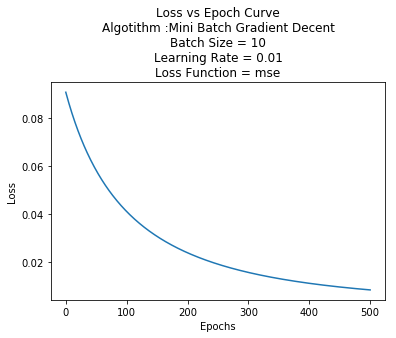

In [25]:
W,B = GD(x,y,500,10,'mse',0.01)

In [26]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[0.96244267203124334, 0.96512222453207297, 0.96777716503858491, 0.97040793775932566, 0.97301497464792963, 0.97559869585937364, 0.978159510184887, 0.98069781546671653, 0.98321399899386674, 0.98570843787986406, 0.98818149942352518, 0.99063354145364879, 0.99306491265849117, 0.99547595290083168, 0.99786699351938768, 1.0002383576172875, 1.0025903603382698, 1.0049233091312373, 1.0072375040037547, 1.0095332377650466, 1.0118107962590168, 1.014070458587784, 1.0163124973261948, 1.0185371787277548, 1.0207447629223887, 1.0229355041064199, 1.0251096507251367, 1.0272674456482958, 1.0294091263388876, 1.0315349250154779, 1.0336450688084173, 1.0357397799102006, 1.0378192757202336, 1.0398837689842653, 1.0419334679287149, 1.0439685763901232, 1.0459892939399391, 1.0479958160048437, 1.049988333982804, 1.0519670353550392, 1.0539321037940728, 1.055883719268033, 1.057822058141362, 1.0597472932720786, 1.061659594105741, 1.063559126766239, 1.0654460541435491, 1.0673205359785718, 1.069182728945169

Loss after 0th epoch = 2.596742904064639

Loss after 1th epoch = 2.0771633121406934

Loss after 2th epoch = 1.839585443274399

Loss after 3th epoch = 1.6923244956815189

Loss after 4th epoch = 1.5881138508615744

Loss after 5th epoch = 1.508599948543216

Loss after 6th epoch = 1.4448978667531236

Loss after 7th epoch = 1.3920875613685908

Loss after 8th epoch = 1.3471836254097502

Loss after 9th epoch = 1.308249907505237

Loss after 10th epoch = 1.2739654210199705

Loss after 11th epoch = 1.2433921298002737

Loss after 12th epoch = 1.2158420299359782

Loss after 13th epoch = 1.1907968326746847

Loss after 14th epoch = 1.1678572278904944

Loss after 15th epoch = 1.1467096218955954

Loss after 16th epoch = 1.12710363353413

Loss after 17th epoch = 1.1088364510925033

Loss after 18th epoch = 1.0917416994510707

Loss after 19th epoch = 1.0756813517985668

Loss after 20th epoch = 1.0605397449788614

Loss after 21th epoch = 1.0462190786881755

Loss after 22th epoch = 1.0326359808431054

Loss

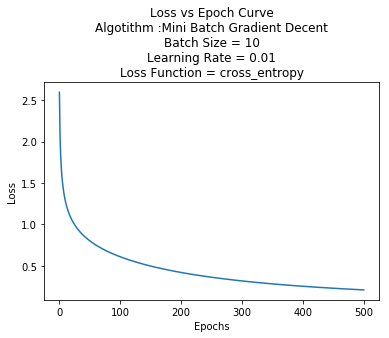

In [27]:
W,B = GD(x,y,500,10,'cross_entropy',0.01)

In [28]:
print('Weight list = \n{}'.format(W))
print('Bias list = \n{}'.format(B))

Weight list = 
[0.24823960322425842, 0.31987348365378665, 0.36669565075214278, 0.40257562717004824, 0.4320527341267355, 0.45724701515402455, 0.47933942613274388, 0.4990629983202729, 0.51690761438852895, 0.53321876864967011, 0.54825033422826419, 0.5621949963031011, 0.57520287967254724, 0.58739350693374759, 0.59886378138980545, 0.60969349334075773, 0.61994922502032757, 0.62968718679206881, 0.63895532030220847, 0.64779488671025032, 0.65624168554520823, 0.66432700361658681, 0.67207836333713333, 0.67952011975046644, 0.68667394189173014, 0.69355920462816956, 0.70019331043634103, 0.70659195577891765, 0.71276935326057733, 0.71873841817827233, 0.72451092617108137, 0.73009764723626502, 0.7355084602835692, 0.74075245155904812, 0.74583799961811903, 0.75077284901843511, 0.75556417450223989, 0.76021863711984916, 0.76474243349190452, 0.76914133920387739, 0.77342074716117293, 0.77758570159886709, 0.78164092833025844, 0.78559086172810189, 0.78943966885777861, 0.79319127111972743, 0.79684936370682857, 0

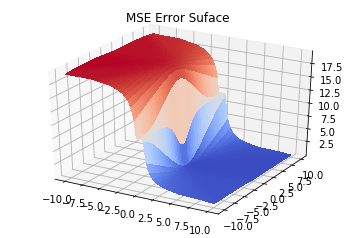

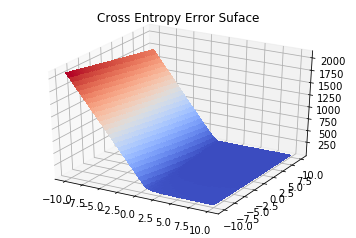

In [23]:
#Error Surface MSE
w = np.linspace(-10,10,num = 1000,dtype = np.float)
b = np.linspace(-10,10,num = 1000,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()
#Error Surface Cross Entropy
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()